<a href="https://colab.research.google.com/github/arkache/Lab-2-BERT-TRANS/blob/main/Lab_2_Transformer_BERT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install googletrans==3.1.0a0
!pip install spacy networkx matplotlib
!python -m spacy download es_core_news_sm
# Instalar las bibliotecas necesarias
!pip install transformers torch scikit-learn wordcloud matplotlib

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=595e9bfde6945b903e90be22871fd3cc8932de2a44e47bb7658ac315234a7ec9
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import files
import io

In [7]:
# Cargar el tokenizador y el modelo BERT para español
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
model = AutoModel.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")



tokenizer_config.json:   0%|          | 0.00/310 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/486k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Por favor, sube tu archivo CSV.


Saving Copia de Comentarios.csv to Copia de Comentarios (2).csv
Columnas en el DataFrame:
Index(['Comentario'], dtype='object')
Introduce el nombre de la columna que contiene los comentarios: Comentario


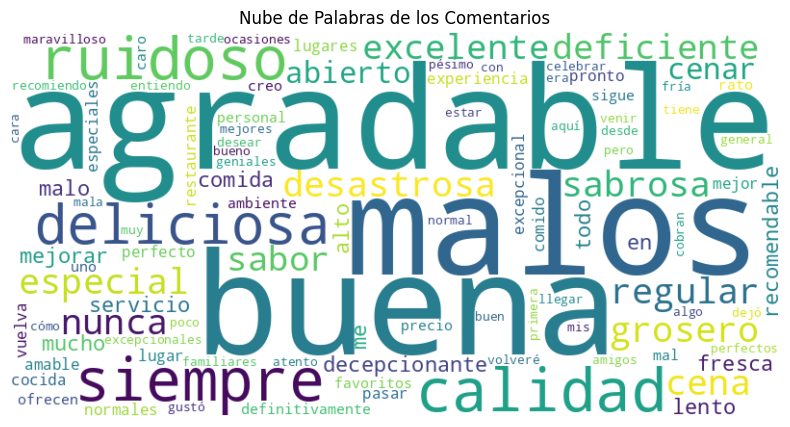

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Palabras clave más relevantes:
agradable: 0.4034
buena: 0.4030
malos: 0.3874
siempre: 0.3783
calidad: 0.3783
ruidoso: 0.3692
deliciosa: 0.3675
desastrosa: 0.3648
especial: 0.3636
grosero: 0.3594
regular: 0.3582
nunca: 0.3542
cena: 0.3520
sabrosa: 0.3520
excelente: 0.3516
sabor: 0.3494
deficiente: 0.3454
abierto: 0.3441
cenar: 0.3429
decepcionante: 0.3413


<Figure size 640x480 with 0 Axes>

In [10]:
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

def extract_keywords(text, top_n=10):
    embedding = get_bert_embeddings(text)
    vectorizer = CountVectorizer().fit([text])
    words = vectorizer.get_feature_names_out()
    word_embeddings = [get_bert_embeddings(word) for word in words]
    similarities = [torch.cosine_similarity(torch.tensor(embedding), torch.tensor(we), dim=0).item() for we in word_embeddings]
    word_sim_tuples = sorted(zip(words, similarities), key=lambda x: x[1], reverse=True)
    return dict(word_sim_tuples[:top_n])

# Cargar el dataset
print("Por favor, sube tu archivo CSV.")
uploaded = files.upload()

# Obtener el nombre del archivo subido
file_name = list(uploaded.keys())[0]

# Cargar el DataFrame
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Verificar las columnas del DataFrame
print("Columnas en el DataFrame:")
print(df.columns)

# Solicitar al usuario el nombre de la columna de comentarios
column_name = input("Introduce el nombre de la columna que contiene los comentarios: ")

# Combinar todos los comentarios en un solo texto
all_text = " ".join(df[column_name].astype(str))

# Extraer palabras clave
keywords = extract_keywords(all_text, top_n=100)

# Crear y mostrar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keywords)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Comentarios')
plt.show()

# Guardar la imagen
plt.savefig('wordcloud.png')
files.download('wordcloud.png')

# Imprimir las palabras clave más relevantes
print("\nPalabras clave más relevantes:")
for word, relevance in sorted(keywords.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"{word}: {relevance:.4f}")

In [ ]:
import pandas as pd
# Importa la biblioteca pandas para manipulación y análisis de datos

import matplotlib.pyplot as plt
# Importa matplotlib para crear gráficos

import seaborn as sns
# Importa seaborn, una biblioteca de visualización basada en matplotlib

from transformers import pipeline
# Importa la función pipeline de la biblioteca transformers para usar modelos de NLP

from collections import Counter
# Importa Counter para contar elementos en una lista

from wordcloud import WordCloud
# Importa WordCloud para crear nubes de palabras


In [ ]:
 #Análisis de sentimientos con estrellas
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
# Crea un analizador de sentimientos usando un modelo BERT multilingüe

def analyze_sentiment_stars(text):
    result = sentiment_analyzer(text[:512])[0]
    # Analiza el sentimiento del texto (limitado a 512 caracteres)
    label = result['label']
    stars = int(label.split()[0])  # Extrae el número de estrellas del label
    return stars
# Define una función para convertir el análisis de sentimiento en estrellas

Esta función hace lo siguiente:

Toma un texto como entrada.
Utiliza el sentiment_analyzer (un modelo BERT preentrenado) para analizar el sentimiento del texto.
Limita el texto a 512 caracteres para evitar errores con textos muy largos.
El resultado del análisis incluye una etiqueta (label) que contiene el número de estrellas.
Extrae el número de estrellas de la etiqueta y lo convierte a un entero.
Devuelve el número de estrellas como resultado.


Función para obtener las palabras más frecuentes:

In [ ]:

# Asumiendo que ya tienes cargado tu DataFrame 'df' con la columna 'Comentario'

#

df['sentiment_stars'] = df['Comentario'].apply(analyze_sentiment_stars)
# Aplica la función de análisis de sentimiento a cada comentario y guarda el resultado

# 2. Longitud de los comentarios
df['comment_length'] = df['Comentario'].apply(len)
# Calcula la longitud de cada comentario

# 3. Análisis de frecuencia de palabras
def get_top_words(text, n=10):
    words = text.lower().split()
    return [word for word, _ in Counter(words).most_common(n) if len(word) > 3]


In [12]:
# Define una función para obtener las palabras más comunes en un texto

df['top_words'] = df['Comentario'].apply(lambda x: ', '.join(get_top_words(x, 5)))
# Aplica la función get_top_words a cada comentario y guarda las 5 palabras más comunes

# Guardar el CSV con el análisis
df.to_csv('analisis_comentarios_detallado.csv', index=False)
# Guarda el DataFrame con el análisis en un archivo CSV

print("CSV guardado como 'analisis_comentarios_detallado.csv'")
# Imprime un mensaje confirmando que se guardó el CSV

# 4. Visualizaciones
# 4.1 Distribución de estrellas
plt.figure(figsize=(10, 6))
# Crea una nueva figura de tamaño 10x6

sns.countplot(x='sentiment_stars', data=df, palette='viridis')
# Crea un gráfico de barras mostrando la distribución de estrellas

plt.title('Distribución de Sentimientos (Estrellas)')
plt.xlabel('Estrellas')
plt.ylabel('Cantidad de Comentarios')
# Añade título y etiquetas a los ejes

plt.savefig('distribucion_estrellas.png')
# Guarda el gráfico como una imagen PNG

plt.close()
# Cierra la figura actual

# 4.2 Longitud de comentarios vs Sentimiento
plt.figure(figsize=(10, 6))
# Crea una nueva figura

sns.boxplot(x='sentiment_stars', y='comment_length', data=df, palette='viridis')
# Crea un gráfico de caja mostrando la relación entre sentimiento y longitud del comentario

plt.title('Longitud de Comentarios vs Sentimiento')
plt.xlabel('Estrellas')
plt.ylabel('Longitud del Comentario')
# Añade título y etiquetas a los ejes

plt.savefig('longitud_vs_sentimiento.png')
# Guarda el gráfico como una imagen PNG

plt.close()
# Cierra la figura actual

# 4.3 Nube de palabras general
all_words = ' '.join(df['Comentario'])
# Une todos los comentarios en un solo texto

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
# Genera una nube de palabras a partir de todos los comentarios

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Todos los Comentarios')
# Crea y configura la figura para mostrar la nube de palabras

plt.savefig('nube_palabras_general.png')
# Guarda la nube de palabras como una imagen PNG

plt.close()
# Cierra la figura actual

# 4.4 Nubes de palabras por sentimiento
for stars in df['sentiment_stars'].unique():
    comments = ' '.join(df[df['sentiment_stars'] == stars]['Comentario'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments)
    # Genera una nube de palabras para cada nivel de sentimiento (estrellas)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras para {stars} Estrellas')
    # Crea y configura la figura para mostrar la nube de palabras

    plt.savefig(f'nube_palabras_{stars}_estrellas.png')
    # Guarda cada nube de palabras como una imagen PNG

    plt.close()
    # Cierra la figura actual

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


CSV guardado como 'analisis_comentarios_detallado.csv'


<ipython-input-12-478c2826a578>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_stars', data=df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length